In [ ]:
# class CSP:
#     def __init__(self, variables, domains, constraints):
#         self.variables = variables        
#         self.domains = domains            
#         self.constraints = constraints    

# # Define constraint function
# def different(x, y):
#     return x != y

# def map_coloring_csp():
#     variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']
    
#     domains = {}
#     for var in variables:
#         domains[var] = ['red', 'green', 'blue']
    
#     constraints = {}
    
#     # Define all constraints explicitly
#     constraints['WA'] = [('NT', different), ('SA', different)]
#     constraints['NT'] = [('WA', different), ('SA', different), ('Q', different)]
#     constraints['SA'] = [('WA', different), ('NT', different), ('Q', different), ('NSW', different), ('V', different)]
#     constraints['Q'] = [('NT', different), ('SA', different), ('NSW', different)]
#     constraints['NSW'] = [('SA', different), ('Q', different), ('V', different)]
#     constraints['V'] = [('SA', different), ('NSW', different)]
#     constraints['T'] = []  # Tasmania has no neighbors
    
#     return CSP(variables, domains, constraints)

In [10]:
constraints = {}
constraints = {
    'WA': [('NT', lambda x, y: x != y), ('SA', lambda x, y: x != y)],
    'NT': [('WA', lambda x, y: x != y), ('SA', lambda x, y: x != y), ('Q', lambda x, y: x != y)],
    'SA': [('WA', lambda x, y: x != y), ('NT', lambda x, y: x != y), ('Q', lambda x, y: x != y), 
        ('NSW', lambda x, y: x != y), ('V', lambda x, y: x != y)],
    'Q': [('NT', lambda x, y: x != y), ('SA', lambda x, y: x != y), ('NSW', lambda x, y: x != y)],
    'NSW': [('SA', lambda x, y: x != y), ('Q', lambda x, y: x != y), ('V', lambda x, y: x != y)],
    'V': [('SA', lambda x, y: x != y), ('NSW', lambda x, y: x != y)],
    'T': []  # Tasmania has no constraints as it's not connected to mainland
}

In [11]:
class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables        
        self.domains = domains            
        self.constraints = constraints    

def map_coloring_csp():
    variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']  
    domains = {}
    for var in variables:
        domains[var] = ['red', 'green', 'blue']  
    
    return CSP(variables, domains, constraints)

In [12]:
def select_unassigned_variable(assignment, csp):
    """Simply returns the first unassigned variable"""
    for var in csp.variables:
        if var not in assignment:
            return var

def is_consistent(var, value, assignment, csp):
    """Check if the assignment is consistent with the constraints"""
    for neighbor, constraint in csp.constraints.get(var, []):
        if neighbor in assignment:
            # Check if this assignment satisfies the constraint
            if not constraint(value, assignment[neighbor]):
                return False
    return True

In [13]:
def backtracking_search(csp):
    return backtrack({}, csp)

def backtrack(assignment, csp):
    # If all variables are assigned, return the complete assignment
    if len(assignment) == len(csp.variables):
        return assignment
    
    # Select an unassigned variable
    var = select_unassigned_variable(assignment, csp)
    
    # Try each value in the domain
    for value in csp.domains[var]:
        if is_consistent(var, value, assignment, csp):
            assignment[var] = value
            result = backtrack(assignment, csp)
            if result is not None:
                return result
            # If we get here, we need to backtrack
            del assignment[var]
    
    return None

In [14]:
def solve_map_coloring():
    csp = map_coloring_csp()
    solution = backtracking_search(csp)
    print("Map coloring solution:")
    for region, color in solution.items():
        print(f"{region}: {color}")

# Run the solver
solve_map_coloring()

Map coloring solution:
WA: red
NT: green
SA: blue
Q: red
NSW: green
V: red
T: red


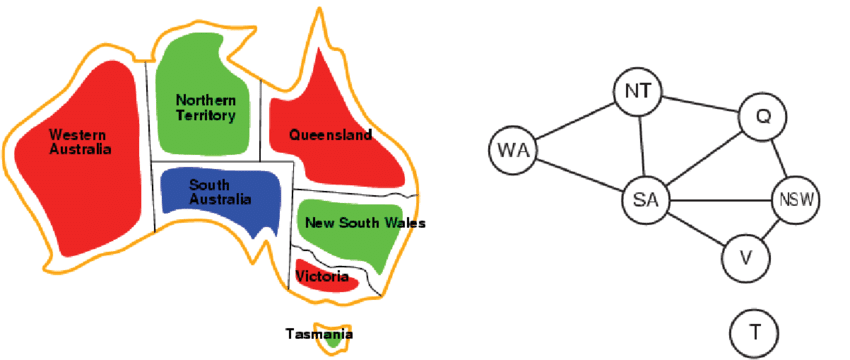

In [15]:
# --- Step 1: Define the Map Coloring Problem Data ---

def setup_map_coloring_problem():
    """Sets up the data for the Australian map coloring problem."""
    variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T'] # Australian territories

    # Domains: Each territory can be red, green, or blue
    domains = {}
    for var in variables:
        domains[var] = ['red', 'green', 'blue']

    # Constraints: Define which regions are adjacent
    # We store a list of neighbors for each region.
    # The implied constraint is that adjacent regions must have different colors.
    constraints = {
        'WA': ['NT', 'SA'],
        'NT': ['WA', 'SA', 'Q'],
        'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
        'Q':  ['NT', 'SA', 'NSW'],
        'NSW':['SA', 'Q', 'V'],
        'V':  ['SA', 'NSW'],
        'T':  [] # Tasmania has no neighbours on the mainland map part
    }
    return variables, domains, constraints

# --- Step 2: Implement Helper Functions for Backtracking ---

def select_unassigned_variable(assignment, variables):
    """Finds the first variable in the list that isn't assigned yet."""
    for var in variables:
        if var not in assignment:
            return var
    return None # Should not happen if assignment isn't complete

def is_consistent(variable, value, assignment, constraints):
    """Checks if assigning 'value' to 'variable' conflicts with neighbours."""
    # Check if the proposed 'value' for 'variable' is the same as any
    # already assigned neighboring variable's value.
    for neighbor in constraints.get(variable, []): # Get neighbors of the current variable
        if neighbor in assignment and assignment[neighbor] == value:
            # Conflict found! The neighbor has the same color.
            return False
    # No conflicts found with assigned neighbors
    return True

# --- Step 3: Implement the Backtracking Solver ---

def backtrack(assignment, variables, domains, constraints):
    """
    The core recursive backtracking function.
    Tries to find a complete and consistent assignment.
    """
    # Base Case: If the assignment is complete (all variables have a color)
    if len(assignment) == len(variables):
        return assignment # Solution found!

    # Select the next variable to assign a color to
    var = select_unassigned_variable(assignment, variables)

    # Try assigning each possible color from the domain to this variable
    for value in domains[var]:
        # Check if this color assignment is consistent with current assignments
        if is_consistent(var, value, assignment, constraints):
            # If consistent, tentatively assign the color
            assignment[var] = value

            # Recursively call backtrack for the next variable
            result = backtrack(assignment.copy(), variables, domains, constraints) # Pass a copy

            # If the recursive call found a solution, return it up the chain
            if result is not None:
                return result

            # If the recursive call failed (returned None), undo the assignment (backtrack)
            # We don't strictly need 'del assignment[var]' here because we pass a copy
            # in the recursive call, but if we passed the original dict, we would need it.
            # Keeping the logic explicit: the path with assignment[var] = value didn't work.

    # If no color worked for the current variable 'var', return None to trigger backtracking
    return None

def solve_csp(variables, domains, constraints):
    """Starts the backtracking search."""
    # Start with an empty assignment dictionary
    initial_assignment = {}
    solution = backtrack(initial_assignment, variables, domains, constraints)
    return solution

# --- Step 4: Run the Solver and Print the Result ---

# Get the problem definition
variables, domains, constraints = setup_map_coloring_problem()

# Solve the problem
solution = solve_csp(variables, domains, constraints)

# Print the result
if solution:
    print("Map coloring solution found:")
    # Sort by region name for consistent output
    for region in sorted(solution.keys()):
        print(f"  {region}: {solution[region]}")
else:
    print("No solution found for the map coloring problem.")

Map coloring solution found:
  NSW: green
  NT: green
  Q: red
  SA: blue
  T: red
  V: red
  WA: red


I'd be happy to help you solve the map coloring problem, starting from the absolute basics and gradually building up more advanced techniques. Let's break this down step by step, assuming no prior knowledge.

# Map Coloring Problem: The Very Basics

The map coloring problem involves assigning colors to regions on a map so that no adjacent regions share the same color. Let's start with understanding this problem visually.

Imagine we have a simple map with 4 regions: A, B, C, and D. Regions A, B, and C all touch each other, and D only touches B and C.

```
    A --- B
    |     |
    |     |
    C --- D
```

Our goal is to color each region using the minimum number of colors so that no adjacent regions have the same color.

## Step 1: Basic DFS Approach

First, let's understand what DFS (Depth-First Search) is. DFS is like exploring a maze - you go as far as possible along one path before backtracking.

Let's implement a very basic DFS for our map coloring problem:

```python
def color_map_basic(graph, colors, regions):
    # Start with the first region
    if len(regions) == 0:
        return {}  # Base case: no regions to color
    
    current_region = regions[0]
    remaining_regions = regions[1:]
    
    # Try each color for the current region
    for color in colors:
        solution = {current_region: color}
        
        # Recursively color the remaining regions
        result = color_map_basic(graph, colors, remaining_regions)
        
        if result is not None:
            solution.update(result)
            return solution
    
    return None  # No solution found
```

Wait, this isn't quite right. Our basic implementation doesn't check if adjacent regions have different colors. Let's fix that:

## Step 2: DFS with Constraint Checking

```python
def color_map_with_constraints(graph, colors, regions, coloring=None):
    if coloring is None:
        coloring = {}
    
    # Base case: all regions are colored
    if len(regions) == 0:
        return coloring
    
    current_region = regions[0]
    remaining_regions = regions[1:]
    
    # Try each color for the current region
    for color in colors:
        coloring[current_region] = color
        
        # Check if this coloring violates any constraints
        valid = True
        for neighbor in graph[current_region]:
            if neighbor in coloring and coloring[neighbor] == color:
                valid = False
                break
        
        if valid:
            # Recursively color the remaining regions
            result = color_map_with_constraints(graph, colors, remaining_regions, coloring.copy())
            if result is not None:
                return result
    
    return None  # No solution found
```

Let's test this with our simple example:

```python
# Define our example map
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

# Available colors
colors = ['Red', 'Green', 'Blue']

# List of regions
regions = ['A', 'B', 'C', 'D']

solution = color_map_with_constraints(graph, colors, regions)
print(solution)
```

This would give us a valid coloring like {'A': 'Red', 'B': 'Green', 'C': 'Blue', 'D': 'Red'}.

## Step 3: Backtracking

The approach we've implemented already includes backtracking! When we find that a color assignment doesn't work, we "backtrack" by trying a different color. If no colors work, we return None, which signals to the previous recursive call that it needs to try a different color.

But let's make our backtracking more explicit and efficient:

```python
def color_map_backtracking(graph, colors, regions, coloring=None):
    if coloring is None:
        coloring = {}
    
    # Base case: all regions are colored
    if len(regions) == 0:
        return coloring
    
    current_region = regions[0]
    remaining_regions = regions[1:]
    
    # Try each color for the current region
    for color in colors:
        # Check if this color is valid for the current region
        if is_valid_color(graph, coloring, current_region, color):
            coloring[current_region] = color
            
            # Recursively color the remaining regions
            result = color_map_backtracking(graph, colors, remaining_regions, coloring.copy())
            if result is not None:
                return result
            
            # If we get here, this color didn't work, so we backtrack
            # (This happens automatically when we try the next color)
    
    return None  # No solution found

def is_valid_color(graph, coloring, region, color):
    # Check if any adjacent region has the same color
    for neighbor in graph[region]:
        if neighbor in coloring and coloring[neighbor] == color:
            return False
    return True
```

This looks very similar to our previous solution, but we've made the constraint checking more explicit with a separate function.

## Step 4: Adding Filtering (Constraint Propagation)

Let's improve our solution by adding filtering. The idea is to reduce the possible colors for each region based on the colors of its neighbors.

```python
def color_map_with_filtering(graph, colors, regions):
    # Initialize domains (possible colors) for each region
    domains = {region: colors.copy() for region in regions}
    
    return backtrack_with_filtering(graph, regions, {}, domains)

def backtrack_with_filtering(graph, unassigned, assignment, domains):
    # Base case: all regions are colored
    if not unassigned:
        return assignment
    
    # Choose the next region to color
    current = unassigned[0]
    remaining = unassigned[1:]
    
    # Try each available color for the current region
    for color in domains[current]:
        if is_valid_color(graph, assignment, current, color):
            # Make a tentative assignment
            assignment[current] = color
            
            # Make a copy of domains for this branch
            new_domains = {r: list(d) for r, d in domains.items()}
            
            # Filter domains of neighbors
            for neighbor in graph[current]:
                if neighbor in remaining and color in new_domains[neighbor]:
                    new_domains[neighbor].remove(color)
            
            # Continue with the reduced domains
            result = backtrack_with_filtering(graph, remaining, assignment.copy(), new_domains)
            if result is not None:
                return result
            
            # If we get here, this color didn't work, so we backtrack
            del assignment[current]
    
    return None  # No solution found
```

The key addition here is that after assigning a color to a region, we remove that color from the domains of its unassigned neighbors. This helps us prune the search space.

## Step 5: Forward Checking

Forward checking is a more systematic approach to filtering. We'll update the domains of unassigned variables after each assignment:

```python
def color_map_forward_checking(graph, colors, regions):
    domains = {region: colors.copy() for region in regions}
    return backtrack_with_forward_checking(graph, regions, {}, domains)

def backtrack_with_forward_checking(graph, unassigned, assignment, domains):
    if not unassigned:
        return assignment
    
    current = unassigned[0]
    remaining = unassigned[1:]
    
    for color in domains[current]:
        if is_valid_color(graph, assignment, current, color):
            assignment[current] = color
            
            # Apply forward checking
            new_domains = {r: list(d) for r, d in domains.items()}
            ok = True
            
            for neighbor in graph[current]:
                if neighbor in remaining:
                    if color in new_domains[neighbor]:
                        new_domains[neighbor].remove(color)
                        if not new_domains[neighbor]:  # Domain wipeout
                            ok = False
                            break
            
            if ok:
                result = backtrack_with_forward_checking(graph, remaining, assignment.copy(), new_domains)
                if result is not None:
                    return result
            
            del assignment[current]
    
    return None
```

The key difference here is that we check for "domain wipeout" - if any unassigned region ends up with no valid colors, we know this branch of the search won't lead to a solution, so we backtrack immediately.

## Step 6: Arc Consistency (AC-3 Algorithm)

Arc consistency takes constraint propagation further. For each pair of regions that are connected (an "arc"), we ensure that for each color in one region's domain, there exists at least one compatible color in the other region's domain.

```python
def color_map_arc_consistency(graph, colors, regions):
    domains = {region: colors.copy() for region in regions}
    
    # Initialize arcs (pairs of adjacent regions)
    arcs = []
    for region in regions:
        for neighbor in graph[region]:
            arcs.append((region, neighbor))
    
    # Establish arc consistency
    if not ac3(graph, domains, arcs):
        return None  # No solution possible
    
    return backtrack_with_ac3(graph, regions, {}, domains)

def ac3(graph, domains, arcs):
    while arcs:
        (xi, xj) = arcs.pop(0)
        
        if revise(graph, domains, xi, xj):
            if not domains[xi]:
                return False  # Domain wipeout
            
            # Add arcs for xi's neighbors (except xj)
            for xk in graph[xi]:
                if xk != xj:
                    arcs.append((xk, xi))
    
    return True

def revise(graph, domains, xi, xj):
    revised = False
    
    for x in domains[xi][:]:  # Iterate over a copy
        # If there's no value in xj's domain that allows x in xi's domain
        if all(x == y for y in domains[xj]):
            domains[xi].remove(x)
            revised = True
    
    return revised

def backtrack_with_ac3(graph, unassigned, assignment, domains):
    if not unassigned:
        return assignment
    
    current = unassigned[0]
    remaining = unassigned[1:]
    
    for color in domains[current]:
        if is_valid_color(graph, assignment, current, color):
            assignment[current] = color
            
            # Create a new domains dictionary for this branch
            new_domains = {r: list(d) for r, d in domains.items()}
            for neighbor in graph[current]:
                if neighbor in remaining and color in new_domains[neighbor]:
                    new_domains[neighbor].remove(color)
            
            # Establish arc consistency again
            arcs = []
            for region in remaining:
                for neighbor in graph[region]:
                    if neighbor in remaining:
                        arcs.append((region, neighbor))
            
            if ac3(graph, new_domains, arcs):
                result = backtrack_with_ac3(graph, remaining, assignment.copy(), new_domains)
                if result is not None:
                    return result
            
            del assignment[current]
    
    return None
```

This implementation of AC-3 is a bit simplified. The `revise` function should actually check if there's any value in xj's domain that is different from the value x in xi's domain, but for the map coloring problem with the "not equal" constraint, this simplified version works.

## Testing Our Solutions

Let's test all our implementations on a more complex example:

```python
# A more complex map (representing a simplified USA map)
graph = {
    'WA': ['ID', 'OR'],
    'OR': ['WA', 'ID', 'CA', 'NV'],
    'CA': ['OR', 'NV', 'AZ'],
    'ID': ['WA', 'OR', 'NV', 'UT', 'WY', 'MT'],
    'NV': ['OR', 'CA', 'AZ', 'UT', 'ID'],
    'AZ': ['CA', 'NV', 'UT', 'NM'],
    'UT': ['ID', 'NV', 'AZ', 'CO', 'WY'],
    'MT': ['ID', 'WY'],
    'WY': ['MT', 'ID', 'UT', 'CO', 'NE', 'SD'],
    'CO': ['WY', 'UT', 'AZ', 'NM', 'OK', 'KS', 'NE'],
    'NM': ['AZ', 'CO', 'OK', 'TX'],
    'SD': ['WY', 'NE'],
    'NE': ['SD', 'WY', 'CO', 'KS', 'MO', 'IA'],
    'KS': ['NE', 'CO', 'OK', 'MO'],
    'OK': ['KS', 'CO', 'NM', 'TX', 'AR', 'MO'],
    'TX': ['NM', 'OK', 'AR', 'LA'],
    'MO': ['IA', 'NE', 'KS', 'OK', 'AR', 'TN', 'KY', 'IL'],
    'AR': ['MO', 'OK', 'TX', 'LA', 'MS', 'TN'],
    'LA': ['TX', 'AR', 'MS'],
    'IA': ['MO', 'NE', 'MN', 'WI', 'IL'],
    'MN': ['IA', 'WI'],
    'WI': ['MN', 'IA', 'IL', 'MI'],
    'IL': ['WI', 'IA', 'MO', 'KY', 'IN'],
    'MI': ['WI', 'IN', 'OH'],
    'IN': ['MI', 'IL', 'KY', 'OH'],
    'OH': ['MI', 'IN', 'KY', 'WV', 'PA'],
    'KY': ['IN', 'IL', 'MO', 'TN', 'VA', 'WV', 'OH'],
    'TN': ['KY', 'MO', 'AR', 'MS', 'AL', 'GA', 'NC', 'VA'],
    'MS': ['LA', 'AR', 'TN', 'AL'],
    'AL': ['MS', 'TN', 'GA', 'FL'],
    'GA': ['AL', 'TN', 'NC', 'SC', 'FL'],
    'FL': ['AL', 'GA'],
    'SC': ['GA', 'NC'],
    'NC': ['SC', 'GA', 'TN', 'VA'],
    'VA': ['NC', 'TN', 'KY', 'WV', 'MD', 'DC'],
    'WV': ['VA', 'KY', 'OH', 'PA', 'MD'],
    'PA': ['OH', 'WV', 'MD', 'DE', 'NJ', 'NY'],
    'MD': ['VA', 'WV', 'PA', 'DE', 'DC'],
    'DC': ['VA', 'MD'],
    'DE': ['MD', 'PA', 'NJ'],
    'NJ': ['DE', 'PA', 'NY'],
    'NY': ['NJ', 'PA', 'VT', 'MA', 'CT'],
    'CT': ['NY', 'MA', 'RI'],
    'RI': ['CT', 'MA'],
    'MA': ['RI', 'CT', 'NY', 'VT', 'NH'],
    'VT': ['NY', 'MA', 'NH'],
    'NH': ['VT', 'MA', 'ME'],
    'ME': ['NH']
}

colors = ['Red', 'Green', 'Blue', 'Yellow']
regions = list(graph.keys())

# Test each implementation
# (This would take time to run for all implementations)
```

Each implementation should give us a valid coloring of the USA map. Let's compare the performance of our different approaches - as we add more advanced techniques, the solution should be found more efficiently with fewer recursive calls.

This gives you a step-by-step progression from a basic DFS approach to more sophisticated techniques like backtracking, filtering, forward checking, and arc consistency. Each step builds on the previous one, making it easier to understand how these algorithms work for solving the map coloring problem.

Would you like me to explain any of these steps in more detail or shall we implement and test one of these approaches with a specific example?